In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from ropt_aqc.initialise_hamiltonians import build_brickwall_circuit
from qiskit.circuit.library import RZZGate, RXXGate

# Heisenberg ZZ 
brickwall_zz = build_brickwall_circuit(
    num_qubits=6, depth=4, gate_fn=lambda theta: RZZGate(theta), parameter_prefix="zz"
)

# Heisenberg XX
brickwall_xx = build_brickwall_circuit(
    num_qubits=6, depth=4, gate_fn=lambda theta: RXXGate(theta), parameter_prefix="xx"
)


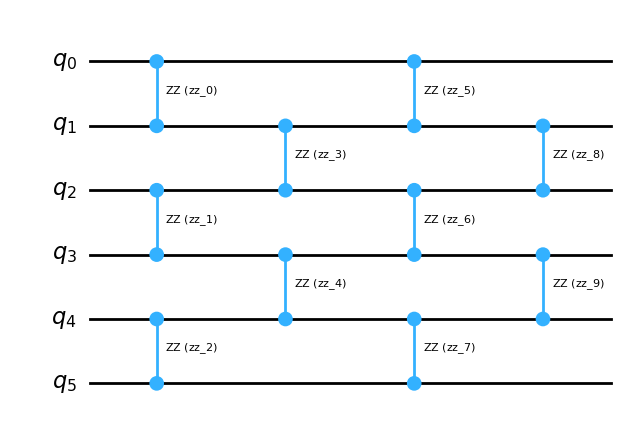

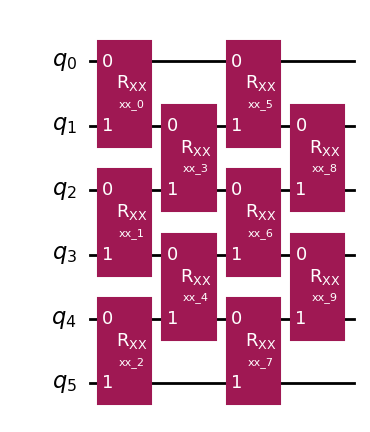

In [3]:
# Plot the circuits
display(brickwall_zz.draw("mpl", style="iqp"))
display(brickwall_xx.draw("mpl", style="iqp"))


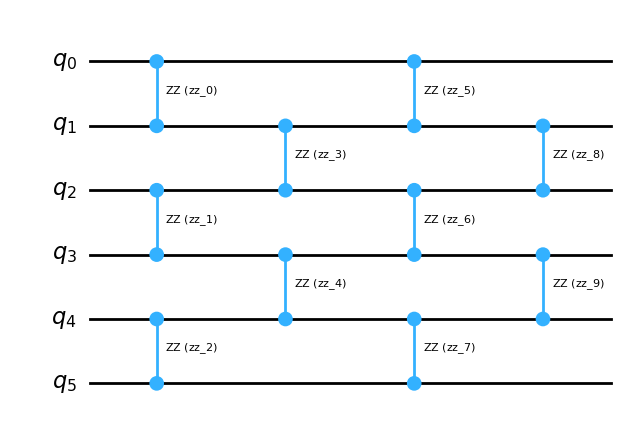

In [4]:
# Ising model
qc_ising = build_brickwall_circuit(
    num_qubits=6,
    depth=4,
    gate_fn=lambda theta: RZZGate(theta),
    parameter_prefix="zz"
)
qc_ising.draw("mpl")


In [5]:
from ropt_aqc.initialise_hamiltonians import get_hamiltonian_terms

ising_terms = get_hamiltonian_terms(6, 'ising-1d', J=1.0, h=0.6, g=0.75)

In [6]:
from ropt_aqc.initialise_hamiltonians import build_matrix_from_terms

H_ising = build_matrix_from_terms(ising_terms, 6)

from jax import numpy as jnp
H_real = jnp.real(H_ising)
with jnp.printoptions(precision=2, suppress=True):
    print(H_real)

[[ 8.6   0.75  0.75 ...  0.    0.    0.  ]
 [ 0.75  5.4   0.   ...  0.    0.    0.  ]
 [ 0.75  0.    3.4  ...  0.    0.    0.  ]
 ...
 [ 0.    0.    0.   ... -1.4   0.    0.75]
 [ 0.    0.    0.   ...  0.    0.6   0.75]
 [ 0.    0.    0.   ...  0.75  0.75  1.4 ]]


/Users/aag/Documents/ropt-aqc/ropt_aqc/initialise_hamiltonians.py:103: UserWarning: Explicitly requested dtype <class 'jax.numpy.complex128'> requested in zeros is not available, and will be truncated to dtype complex64. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  H = jnp.zeros((2**num_qubits, 2**num_qubits), dtype=jnp.complex128)


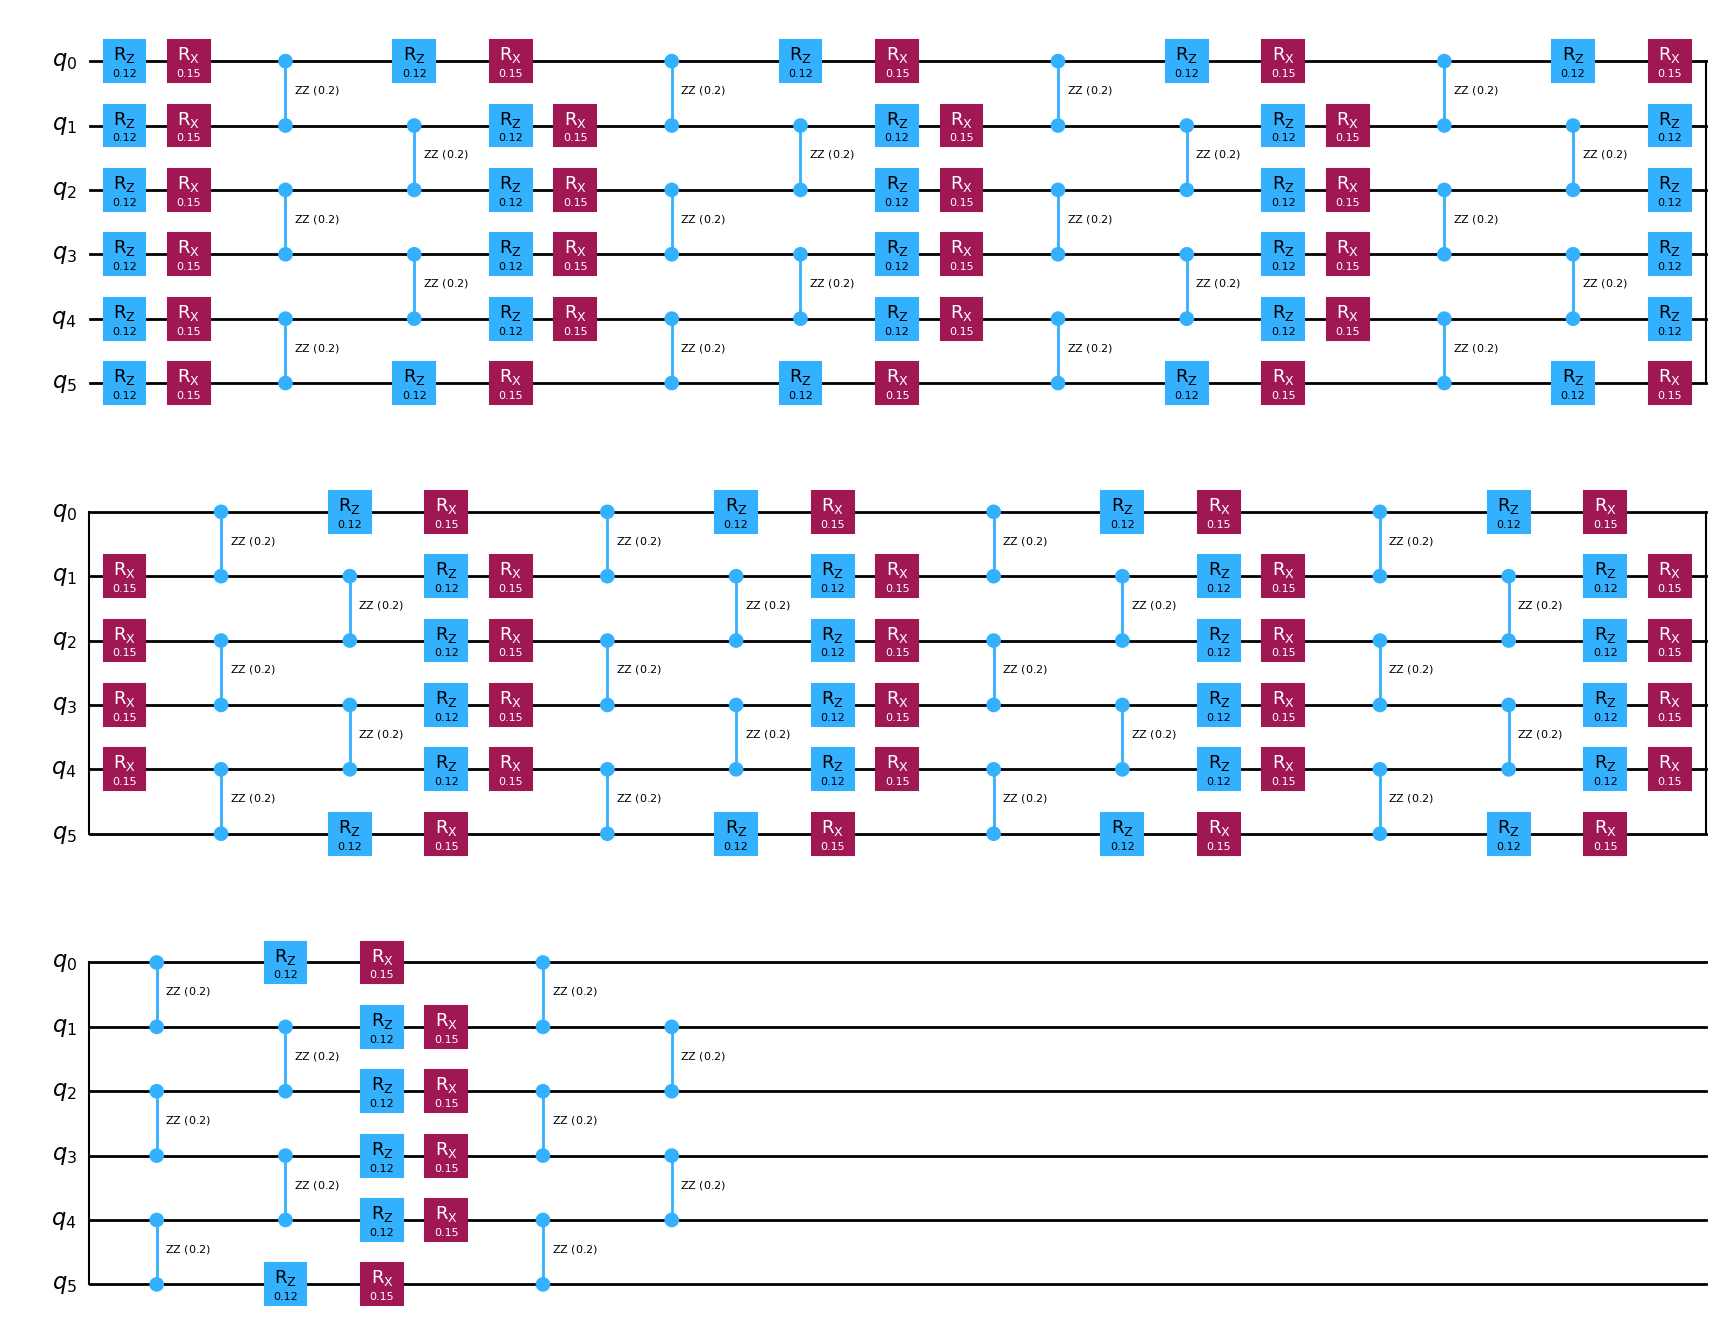

In [10]:
from ropt_aqc.circuit_building import build_trotterised_brickwall_circuit

qc_ising = build_trotterised_brickwall_circuit(system='standard', hamiltonian_terms=ising_terms, num_qubits=6, time=1, num_steps=10)
qc_ising.draw("mpl")


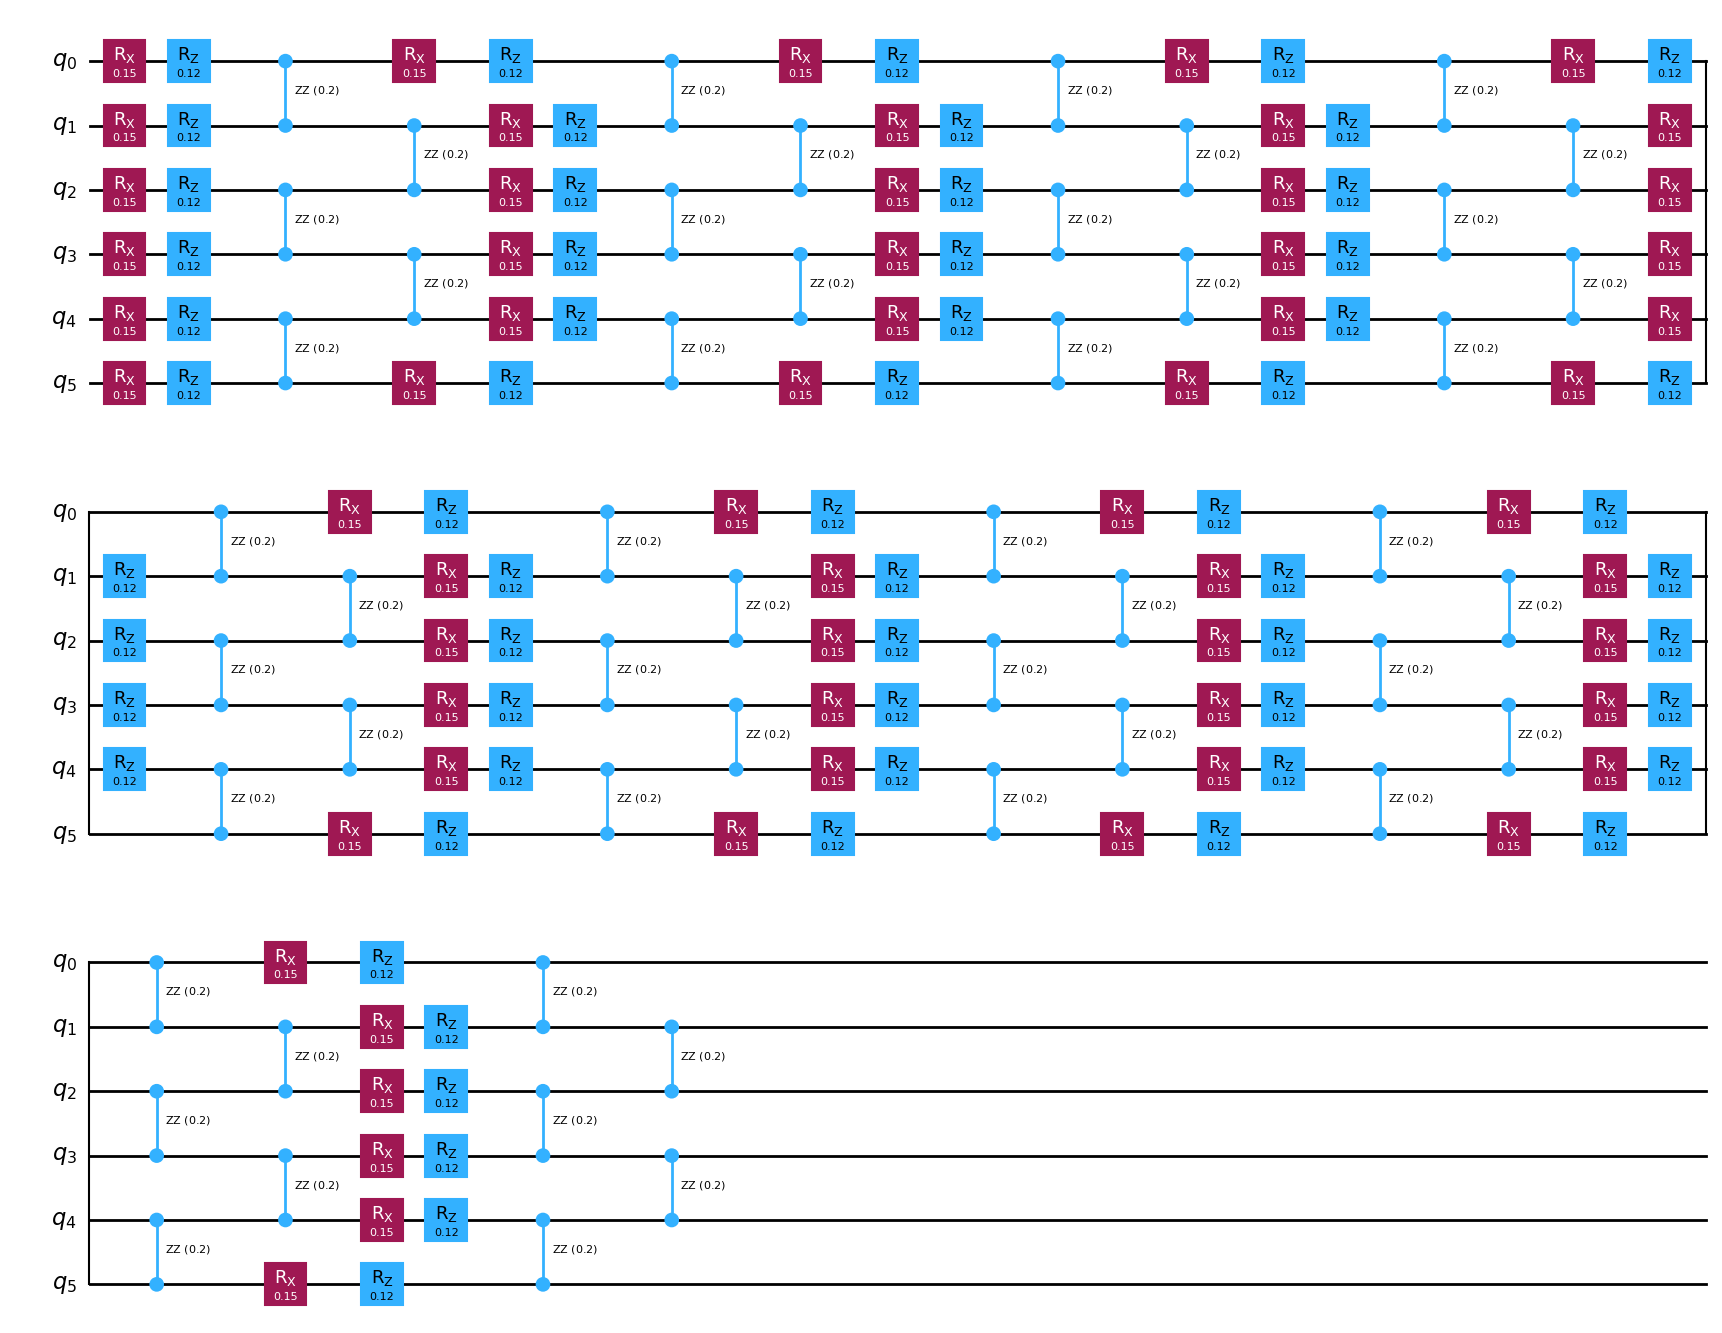

In [9]:
qc_ising_sp = build_trotterised_brickwall_circuit(hamiltonian_terms=ising_terms, system='ising-1d', num_qubits=6, time=1, num_steps=10)
qc_ising_sp.draw("mpl")

In [11]:
from ropt_aqc.circuit_building import extract_gate_matrices
gate_seq_ising = extract_gate_matrices(qc_ising_sp)
print(gate_seq_ising)

[(array([[0.99718882+0.j        , 0.        -0.07492971j],
       [0.        -0.07492971j, 0.99718882+0.j        ]]), [0]), (array([[0.99820054-0.05996401j, 0.        +0.j        ],
       [0.        +0.j        , 0.99820054+0.05996401j]]), [0]), (array([[0.99718882+0.j        , 0.        -0.07492971j],
       [0.        -0.07492971j, 0.99718882+0.j        ]]), [1]), (array([[0.99820054-0.05996401j, 0.        +0.j        ],
       [0.        +0.j        , 0.99820054+0.05996401j]]), [1]), (array([[0.99718882+0.j        , 0.        -0.07492971j],
       [0.        -0.07492971j, 0.99718882+0.j        ]]), [2]), (array([[0.99820054-0.05996401j, 0.        +0.j        ],
       [0.        +0.j        , 0.99820054+0.05996401j]]), [2]), (array([[0.99718882+0.j        , 0.        -0.07492971j],
       [0.        -0.07492971j, 0.99718882+0.j        ]]), [3]), (array([[0.99820054-0.05996401j, 0.        +0.j        ],
       [0.        +0.j        , 0.99820054+0.05996401j]]), [3]), (array([[0.9971

In [26]:
heisenberg_terms = get_hamiltonian_terms(12, 'heisenberg', J=[1, 1, -0.5], h=[0.75, 0, 0])


In [27]:
from jax import numpy as jnp
H_heisenberg = build_matrix_from_terms(heisenberg_terms, 12)
with jnp.printoptions(precision=2, suppress=True):
    print(H_heisenberg)

[[-5.5 +0.j  0.75+0.j  0.75+0.j ...  0.  +0.j  0.  +0.j  0.  +0.j]
 [ 0.75+0.j -4.5 +0.j  2.  +0.j ...  0.  +0.j  0.  +0.j  0.  +0.j]
 [ 0.75+0.j  2.  +0.j -3.5 +0.j ...  0.  +0.j  0.  +0.j  0.  +0.j]
 ...
 [ 0.  +0.j  0.  +0.j  0.  +0.j ... -3.5 +0.j  2.  +0.j  0.75+0.j]
 [ 0.  +0.j  0.  +0.j  0.  +0.j ...  2.  +0.j -4.5 +0.j  0.75+0.j]
 [ 0.  +0.j  0.  +0.j  0.  +0.j ...  0.75+0.j  0.75+0.j -5.5 +0.j]]


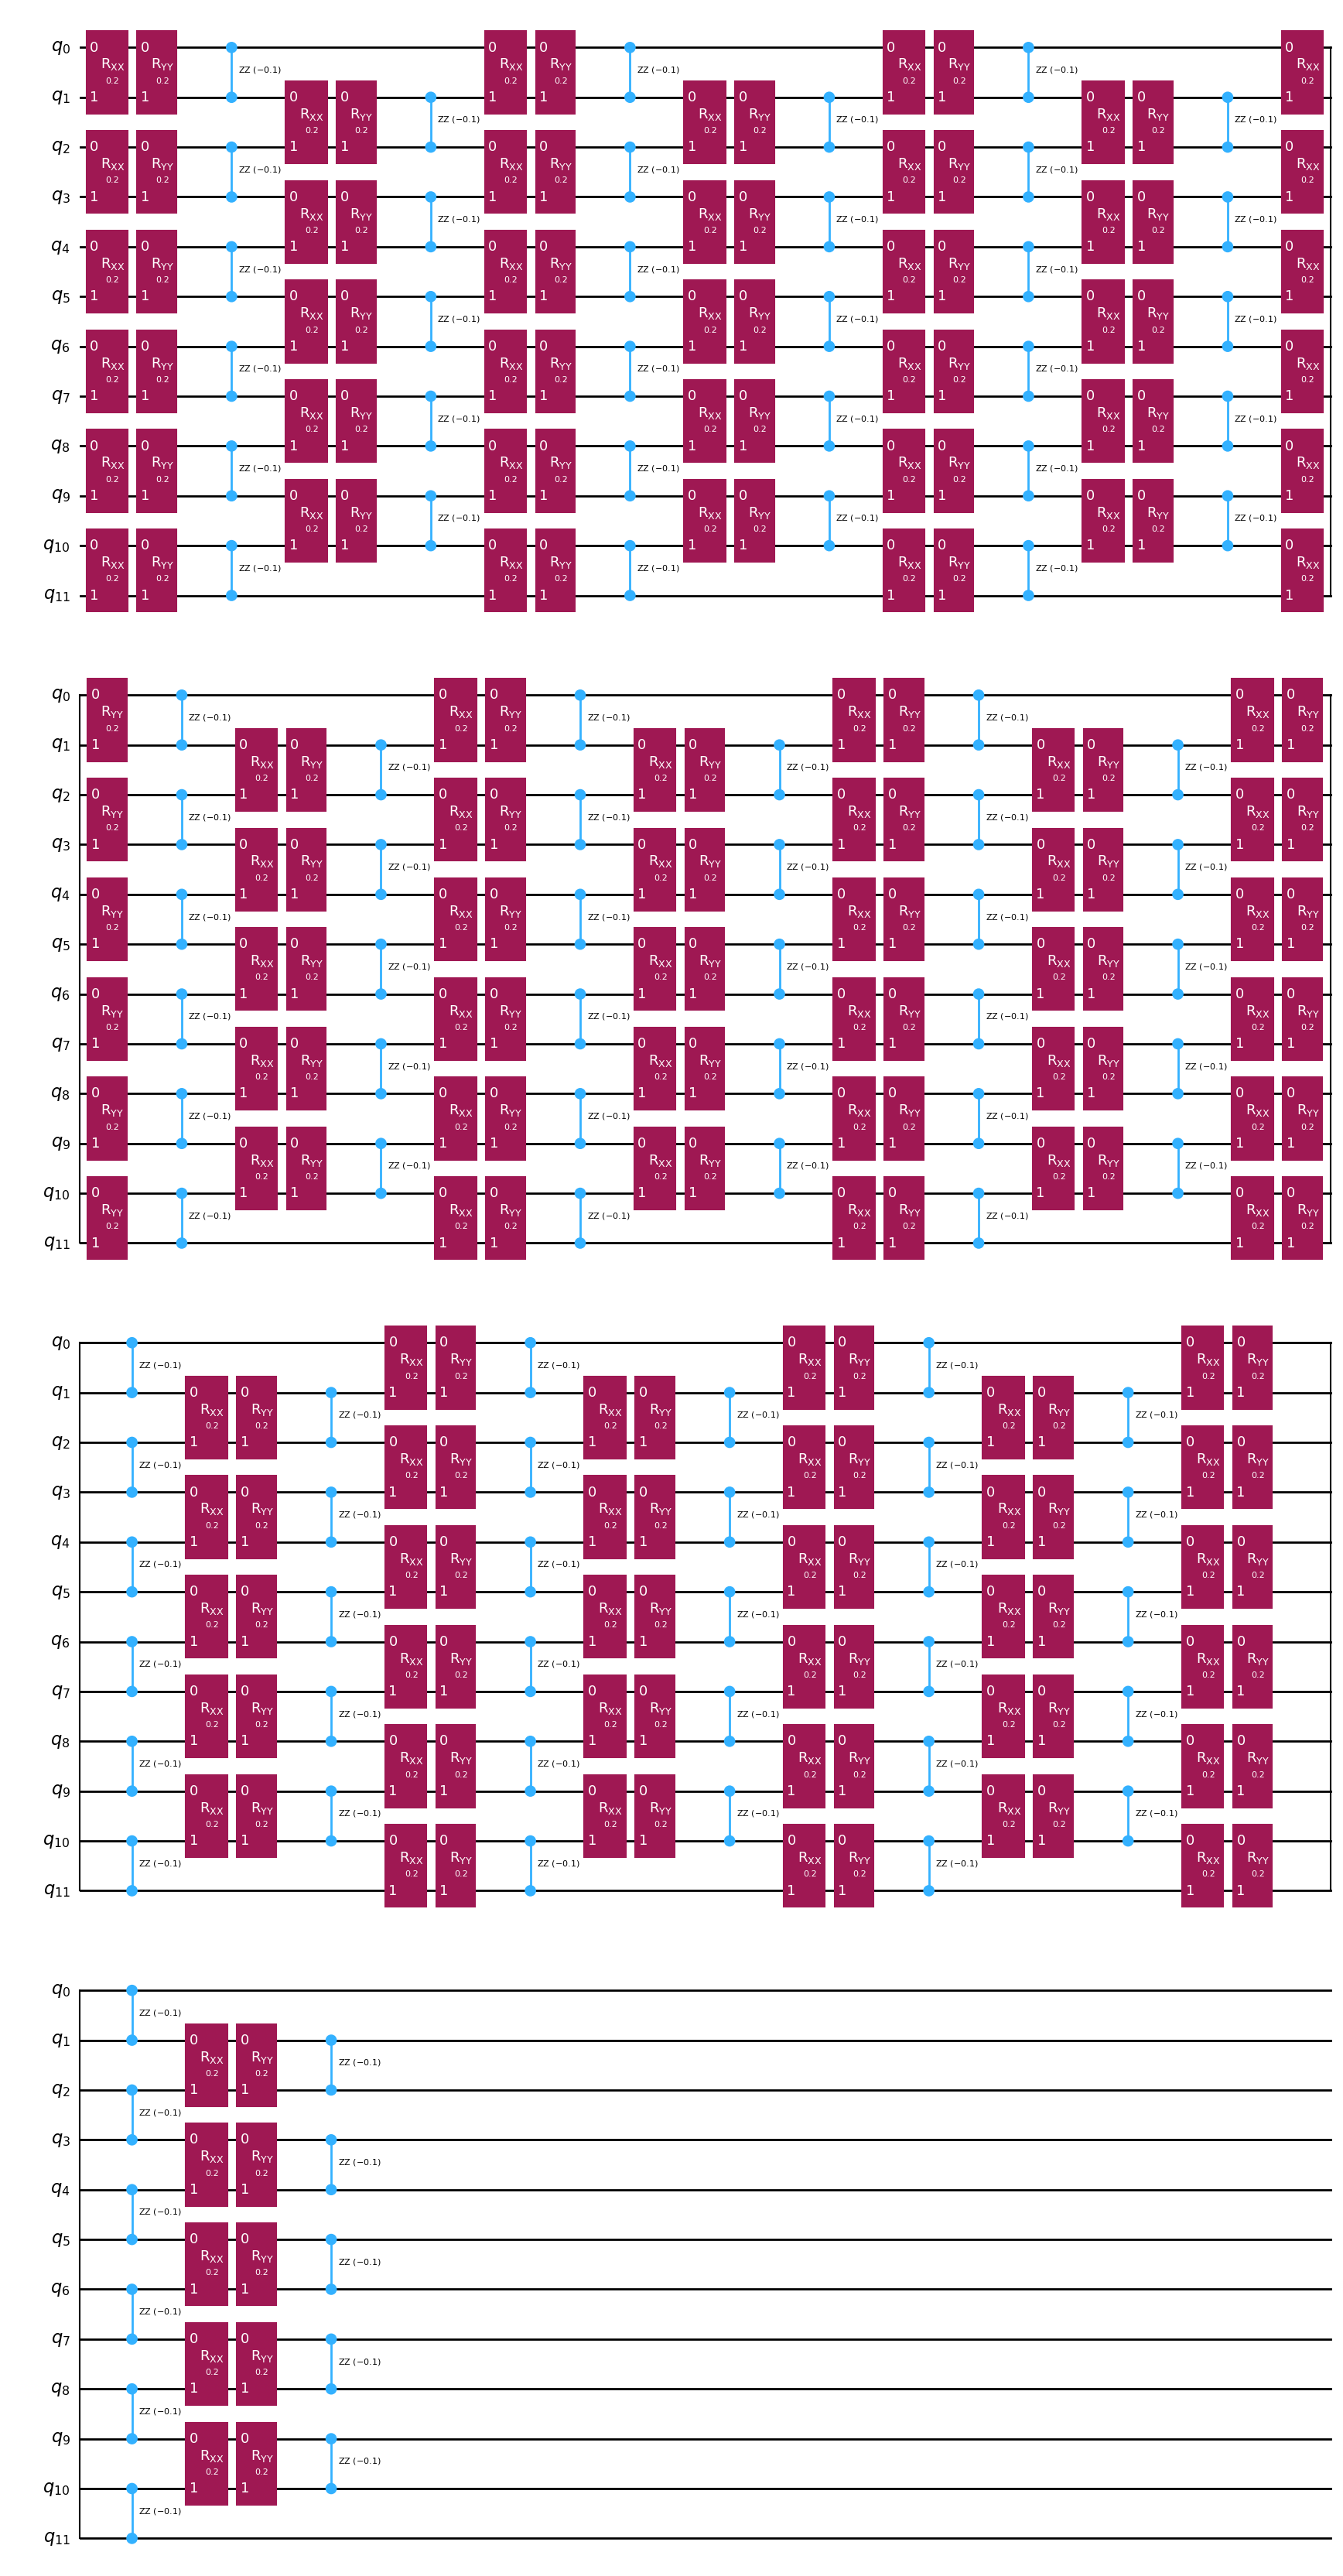

In [28]:
qc_heisenberg = build_trotterised_brickwall_circuit(hamiltonian_terms=heisenberg_terms, num_qubits=12, time=1, num_steps=10)
qc_heisenberg.draw("mpl")

In [31]:
from ropt_aqc.circuit_building import extract_gate_matrices

gate_seq_heisenberg = extract_gate_matrices(qc_heisenberg)
print(gate_seq_heisenberg)

[(array([[ 0.99500417+0.j        ,  0.        +0.j        ,
         0.        +0.j        , -0.        -0.09983342j],
       [ 0.        +0.j        ,  0.99500417+0.j        ,
        -0.        -0.09983342j,  0.        +0.j        ],
       [ 0.        +0.j        , -0.        -0.09983342j,
         0.99500417+0.j        ,  0.        +0.j        ],
       [-0.        -0.09983342j,  0.        +0.j        ,
         0.        +0.j        ,  0.99500417+0.j        ]]), [0, 1]), (array([[ 0.99500417+0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.09983342j],
       [ 0.        +0.j        ,  0.99500417+0.j        ,
        -0.        -0.09983342j,  0.        +0.j        ],
       [ 0.        +0.j        , -0.        -0.09983342j,
         0.99500417+0.j        ,  0.        +0.j        ],
       [ 0.        +0.09983342j,  0.        +0.j        ,
         0.        +0.j        ,  0.99500417+0.j        ]]), [0, 1]), (array([[0.99875026+0.04997917j, 0.    

In [12]:
from qiskit.quantum_info import Operator
U_qiskit = Operator(qc_ising_sp).data


In [14]:
from functools import reduce
from jax.numpy import eye, kron
import numpy as np

def apply_gate_sequence(gate_seq, num_qubits, qubit_pairs):
    U_total = np.eye(2**num_qubits, dtype=np.complex128)
    for U, (i, j) in zip(gate_seq, qubit_pairs):
        full_U = [eye(2)] * num_qubits
        full_U[i] = None  # placeholder
        full_U[j] = None
        # Build full gate with kron
        before = kron(*full_U[:i]) if i > 0 else 1
        after = kron(*full_U[j+1:]) if j < num_qubits-1 else 1
        full_gate = kron(before, kron(U, after))  # naive method
        U_total = full_gate @ U_total
    return U_total
